# **BIG DATA PROJECT**

# **RAMSES MORENO DE LA CRUZ - MMU ID: 23624012**

# **1. SET UP ENVIRONMENT / CONFIGURATIONS**

In [ ]:
#Set-Up spark using shell commands
  #Lists the files and directories in the current working directory.
!ls
  #Removes some files
!rm -f spark-3.4.[01]-bin-hadoop3.tgz*
!rm -rf spark-3.4.[01]-bin-hadoop3
  #Installs the OpenJDK 8 Java Development Kit (JDK)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
  #Downloads files from the web.
!wget https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz
  #Extracts file
!tar -xf spark-3.4.2-bin-hadoop3.tgz
  #Lists the files and directories in the current working directory.
!ls -alt

sample_data
--2024-03-30 12:42:53--  https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.208.237, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388664780 (371M) [application/x-gzip]
Saving to: ‘spark-3.4.2-bin-hadoop3.tgz’

spark-3.4.2-bin-had 100%[===================>] 370.66M  66.2MB/s    in 6.4s    

2024-03-30 12:42:59 (58.3 MB/s) - ‘spark-3.4.2-bin-hadoop3.tgz’ saved [388664780/388664780]

total 379576
drwxr-xr-x  1 root root      4096 Mar 30 12:42 .
drwxr-xr-x  1 root root      4096 Mar 30 12:42 ..
drwxr-xr-x  1 root root      4096 Mar 28 23:00 sample_data
drwxr-xr-x  4 root root      4096 Mar 28 22:59 .config
-rw-r--r--  1 root root 388664780 Nov 25 07:49 spark-3.4.2-bin-hadoop3.tgz
drwxr-xr-x 13 1000 1000      4096 Nov 25 07:48 spark-3.4.2-bin-hadoop3


In [ ]:
#Installs findspark
!pip3 install findspark

In [ ]:
#Imports the Python os module for interacting with the operating system.
import os

#Sets JAVA and SPARK environmental variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.2-bin-hadoop3"

#Imports the findspark module
import findspark

#Initializes the findspark module
findspark.init()
from pyspark import SparkConf, SparkContext

#The next line gives us 'local' mode to running Spark
  #'local[2]' to use 2 cores
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')

#Creates Spark Context
sc1 = SparkContext(conf=spark_conf)

#Imports functions and classes with the aim to work with Spark SQL.
from pyspark.sql import *
from pyspark.sql.functions import *

#Creates Spark Session
  #"SparkSession" and "sc" are are key handles in to Spark API
  #It is helpful to build dataframes
spark = SparkSession.builder.appName("bikes").getOrCreate()

  #Import libraries/modules for graphs and statistical tests
import matplotlib.pyplot as plt
import pandas as pd

# **2. LOADING THE DATA**

In [ ]:
# get file for given year from TfL open data
  #Downloads files from the web.
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip

  #Unzip files
!unzip cyclehireusagestats-2014.zip

--2024-03-30 12:43:38--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.212.132, 104.16.213.132
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.212.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   109MB/s    in 2.0s    

2024-03-30 12:43:40 (109 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  


# **3. EXPLORATORY DATA ANALYSIS (EDA)**

## **3.1. CHECKING THE SPARK DATAFRAMES**


* **Goal 1**: Identify dataframes that do not have the same number of columns.
* **Goal 2**: Gain a better understanding of the structure, and number of rows of the dataframes.




In [ ]:
#Read the file in to a dataframe called "j1_df"
file1="/content/1. Journey Data Extract 05Jan14-02Feb14.csv"
j1_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file1))

#Print the first row of the spark dataframe
print("\nFirst row of the spark dataframe:\n")
j1_df.show(1)

# Count instances of the spark dataframe
j1_df_counts = j1_df.count()
print("There are ",j1_df_counts," rows in this spark dataframe\n")



First row of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 29747123|    1140|    469|05/01/2014 15:54|           55|Finsbury Circus, ...|05/01/2014 15:35|            295|Swan Street, The ...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  463523  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j2_df"
file2="/content/2. Journey Data Extract 03Feb14-01Mar14.csv"
j2_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file2))

#Print the first row of the spark dataframe
print("First row of the spark dataframe:\n")
j2_df.show(1)

# Count instances of the spark dataframe
j2_df_counts = j2_df.count()
print("There are ",j2_df_counts," rows in this spark dataframe\n")

First row of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 30286260|    1260|  12218|03/02/2014 23:24|          697|Charlotte Terrace...|03/02/2014 23:03|            311|Foley Street, Fit...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  521161  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j3_df"
file3="/content/3. Journey Data Extract 02Mar14-31Mar14.csv"
j3_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file3))

#Print the first row of the spark dataframe
print("First row of the spark dataframe:\n")
j3_df.show(1)

# Count instances of the spark dataframe
j3_df_counts = j3_df.count()
print("There are ",j3_df_counts," rows in this spark dataframe\n")

First row of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 30845679|    1380|   6523|03/03/2014 23:27|          695|Islington Green, ...|03/03/2014 23:04|            311|Foley Street, Fit...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  729984  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j4_df"
file4="/content/4. Journey Data Extract 01Apr14-26Apr14.csv"
j4_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file4))

#Print the first row of the spark dataframe
print("First row of the spark dataframe:\n")
j4_df.show(1)

# Count instances of the spark dataframe
j4_df_counts = j4_df.count()
print("There are ",j4_df_counts," rows in this spark dataframe\n")

First row of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 31598682|     540|    982|01/04/2014 00:09|          544|Percival Street, ...|01/04/2014 00:00|            217|Wormwood Street, ...|null|null|null|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
only showing top 1 row

There are  651974  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j5_df"
file5="/content/5. Journey Data Extract 27Apr14-24May14.csv"
j5_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file5))

#Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j5_df.show(1)

# Count instances of the spark dataframe
j5_df_counts = j5_df.count()
print("There are ",j5_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 32685876|    1200|   6271|08/05/2014 23:33|          697|Charlotte Terrace...|08/05/2014 23:13|            242|Beaumont Street, ...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  849196  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j6_df"
file6="/content/6. Journey Data Extract 25May14-21Jun14.csv"
j6_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file6))

#Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j6_df.show(1)

# Count instances of the spark dataframe
j6_df_counts = j6_df.count()
print("There are ",j6_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 33253206|    1140|  11439|27/05/2014 00:59|          695|Islington Green, ...|27/05/2014 00:40|             81|Great Titchfield ...|null|null|null|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
only showing top 1 row

There are  914892  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j7_df"
file7="/content/7. Journey Data Extract 22Jun14-19Jul14.csv"
j7_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file7))

#Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j7_df.show(1)

# Count instances of the spark dataframe
j7_df_counts = j7_df.count()
print("There are ",j7_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  996095  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j8a_df"
file8a="/content/8a Journey Data Extract 20Jul14-31Jul14.csv"
j8a_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file8a))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j8a_df.show(1)

# Count instances of the spark dataframe
j8a_df_counts = j8a_df.count()
print("There are ",j8a_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 35667421|     180|   2665|30/07/2014 07:01|            6|Broadcasting Hous...|30/07/2014 06:58|             28|Bolsover Street, ...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  473850  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j8b_df"
file8b="/content/8b Journey Data Extract 01Aug14-16Aug14.csv"
j8b_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file8b))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j8b_df.show(1)

# Count instances of the spark dataframe
j8b_df_counts = j8b_df.count()
print("There are ",j8b_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 35815795|    1860|    939|02/08/2014 15:39|          695|Islington Green, ...|02/08/2014 15:08|              6|Broadcasting Hous...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  584618  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j9a_df"
file9a="/content/9a Journey Data Extract 17Aug14-31Aug14.csv"
j9a_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file9a))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j9a_df.show(1)

# Count instances of the spark dataframe
j9a_df_counts = j9a_df.count()
print("There are ",j9a_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 36389367|     300|   4107|17/08/2014 00:05|          206|New Road 1 , Whit...|17/08/2014 00:00|            444|Bethnal Green Gar...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  902300  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j9b_df"
file9b="/content/9b Journey Data Extract 01Sep14-13Sep14.csv"
j9b_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file9b))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j9b_df.show(1)

# Count instances of the spark dataframe
j9b_df_counts = j9b_df.count()
print("There are ",j9b_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 36873128|     180|   6167|01/09/2014 00:03|          371|King Edward Walk,...|01/09/2014 00:00|            645|Great Suffolk Str...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  452136  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j10a_df"
file10a="/content/10a. Journey Data Extract 14Sep14-27Sep14.csv"
j10a_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file10a))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j10a_df.show(1)

# Count instances of the spark dataframe
j10a_df_counts = j10a_df.count()
print("There are ",j10a_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+-----------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+-----------------+
| 37355204|    1260|    101|14/09/2014 00:21|          533|Wellington Row, B...|14/09/2014 00:00|            496| Devons Road, Bow|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+-----------------+
only showing top 1 row

There are  488627  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j10b_df"
file10b="/content/10b. Journey Data Extract 28Sep14-11Oct14.csv"
j10b_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file10b))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j10b_df.show(1)

# Count instances of the spark dataframe
j10b_df_counts = j10b_df.count()
print("There are ",j10b_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 37875851|     120|   3229|28/09/2014 00:02|          450|Jubilee Street, S...|28/09/2014 00:00|            443|Philpot Street, W...|null|null|null|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
only showing top 1 row

There are  919009  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j11a_df"
file11a="/content/11a. Journey Data Extract 12Oct14-08Nov14.csv"
j11a_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file11a))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j11a_df.show(1)

# Count instances of the spark dataframe
j11a_df_counts = j11a_df.count()
print("There are ",j11a_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 39033160|     120|   9725|04/11/2014 13:31|           93|Cloudesley Road, ...|04/11/2014 13:29|            339|Risinghill Street...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  399999  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j11b_df"
file11b="/content/11b. Journey Data Extract 12Oct14-08Nov14.csv"
j11b_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file11b))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j11b_df.show(1)

# Count instances of the spark dataframe
j11b_df_counts = j11b_df.count()
print("There are ",j11b_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 38413165|     900|   6692|15/10/2014 10:25|          168|Argyll Road, Kens...|15/10/2014 10:10|            218|St. Luke's Church...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  363005  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j12a_df"
file12a="/content/12a. Journey Data Extract 09Nov14-06Dec14.csv"
j12a_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file12a))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j12a_df.show(1)

# Count instances of the spark dataframe
j12a_df_counts = j12a_df.count()
print("There are ",j12a_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+-----------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|  EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+-----------------+----------------+---------------+--------------------+
| 39149324|     120|   3936|09/11/2014 00:02|          470|Mostyn Grove, Bow|09/11/2014 00:00|            498|Bow Road Station,...|
+---------+--------+-------+----------------+-------------+-----------------+----------------+---------------+--------------------+
only showing top 1 row

There are  339479  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j12b_df"
file12b="/content/12b. Journey Data Extract 09Nov14-06Dec14.csv"
j12b_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file12b))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j12b_df.show(1)

# Count instances of the spark dataframe
j12b_df_counts = j12b_df.count()
print("There are ",j12b_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 39512728|     420|  10235|23/11/2014 00:07|          633|Vereker Road, Wes...|23/11/2014 00:00|            727|Chesilton Road, F...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  305659  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j13a_df"
file13a="/content/13a. Journey Data Extract 07Dec14-21Dec14.csv"
j13a_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file13a))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j13a_df.show(1)

# Count instances of the spark dataframe
j13a_df_counts = j13a_df.count()
print("There are ",j13a_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 39838892|     540|   8382|07/12/2014 00:09|          450|Jubilee Street, S...|07/12/2014 00:00|            460|Burdett Road, Mil...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  298350  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j13b_df"
file13b="/content/13b. Journey Data Extract 22Dec14-03Jan15.csv"
j13b_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file13b))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j13b_df.show(1)

# Count instances of the spark dataframe
j13b_df_counts = j13b_df.count()
print("There are ",j13b_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 40154802|     120|  12760|22/12/2014 00:03|          450|Jubilee Street, S...|22/12/2014 00:01|            443|Philpot Street, W...|null|null|null|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
only showing top 1 row

There are  472735  rows in this spark dataframe



In [ ]:
#Read the file in to a dataframe called "j14_df"
file14="/content/14. Journey Data Extract 08Dec13-04Jan14.csv"
j14_df = (spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file14))

# Print the first rows of the spark dataframe
print("First rows of the spark dataframe:\n")
j14_df.show(1)

# Count instances of the spark dataframe
j14_df_counts = j14_df.count()
print("There are ",j14_df_counts," rows in this spark dataframe\n")

First rows of the spark dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 29440493|    1380|   1056|12/12/2013 23:38|          695|Islington Green, ...|12/12/2013 23:15|            311|Foley Street, Fit...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  355004  rows in this spark dataframe



In [ ]:
# Count instances of the spark dataframe
allcounts = (j1_df_counts
             + j2_df_counts
             + j3_df_counts
             + j4_df_counts
             + j5_df_counts
             + j6_df_counts
             + j7_df_counts
             + j8a_df_counts
             + j8b_df_counts
             + j9a_df_counts
             + j9b_df_counts
             + j10a_df_counts
             + j10b_df_counts
             + j11a_df_counts
             + j11b_df_counts
             + j12a_df_counts
             + j12b_df_counts
             + j13a_df_counts
             + j13b_df_counts
             + j14_df_counts
            )

# Count instances of the spark dataframe
print("There are ",allcounts," rows in the whole dataset\n")

There are  11481596  rows in the whole dataset



## **3.2.   MODIFYING THE SPARK DATAFRAMES THAT HAVE EXTRA COLUMNS**

* **Goal**: The following modification (i.e. **dropping columns**) is based on the fact that the files called "file4", "file6", "file10b" and "file13b" have a different numbers of columns compared to the rest of the files.

In [ ]:
#Print the first row of the modified spark dataframes
  #Note: The * syntax is used to unpack the list into individual parameters so that it can be passed as an argument to the function.

#Columns to drop
columns_to_drop = ['_c9','_c10','_c11']

#Spark Dataframes to modify
j4_df2 = j4_df.drop(*columns_to_drop)
j6_df2 = j6_df.drop(*columns_to_drop)
j10b_df2 = j10b_df.drop(*columns_to_drop)
j13b_df2 = j13b_df.drop(*columns_to_drop)

#Print the first row of the modified Spark dataframes just to check that the columns were dropped.
print("\nSchema of the modified Spark dataframes:\n")
print(j4_df2)
print(j6_df2)
print(j10b_df2)
print(j13b_df2)


Schema of the modified Spark dataframes:

DataFrame[Rental Id: int, Duration: int, Bike Id: int, End Date: string, EndStation Id: int, EndStation Name: string, Start Date: string, StartStation Id: int, StartStation Name: string]
DataFrame[Rental Id: int, Duration: int, Bike Id: int, End Date: string, EndStation Id: int, EndStation Name: string, Start Date: string, StartStation Id: int, StartStation Name: string]
DataFrame[Rental Id: int, Duration: int, Bike Id: int, End Date: string, EndStation Id: int, EndStation Name: string, Start Date: string, StartStation Id: int, StartStation Name: string]
DataFrame[Rental Id: int, Duration: int, Bike Id: int, End Date: string, EndStation Id: int, EndStation Name: string, Start Date: string, StartStation Id: int, StartStation Name: string]


## **3.3. BUILDING THE "MAIN SPARK DATAFRAME"**

* **Goal**: Build the "Main Spark dataframe based on the small Spark dataframes of Section 3.1. and Section 3.2.

In [ ]:
# Main Spark Dataframe
allj_df = (j1_df
           .union(j2_df)
           .union(j3_df)
           .union(j4_df2) #It was modified in Section 3.2
           .union(j5_df)
           .union(j6_df2) #It was modified in Section 3.2
           .union(j7_df)
           .union(j8a_df)
           .union(j8b_df)
           .union(j9a_df)
           .union(j9b_df)
           .union(j10a_df)
           .union(j10b_df2) #It was modified in Section 3.2
           .union(j11a_df)
           .union(j11b_df)
           .union(j12a_df)
           .union(j12b_df)
           .union(j13a_df)
           .union(j13b_df2) #It was modified in Section 3.2
           .union(j14_df)
          )
print("\nFirst row of the Main Spark Dataframe:\n")
allj_df.show(1)

# Number of rows of the Main Spark Dataframe
allj_df_counts = allj_df.count()
print("There are ",allj_df_counts," rows in the Main Spark Dataframe\n")


First row of the Main Spark Dataframe:

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 29747123|    1140|    469|05/01/2014 15:54|           55|Finsbury Circus, ...|05/01/2014 15:35|            295|Swan Street, The ...|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
only showing top 1 row

There are  11481596  rows in the Main Spark Dataframe



## **3.4. MODIFYING THE "MAIN SPARK DATAFRAME" BUILT IN SECTION 3.3**

* **Goal 1**: Drop duplicate values.
* **Goal 2**: Drop null/zero values.

In [ ]:
#Dropping duplicate values.
  #Note: "pyspark.sql.DataFrame.distinct()" is used to get the unique rows from all the columns from DataFrame.
  #A "non-unique" row is a row in which all the values of every single column are exactly the same as the other row.
allj_distinct_df = allj_df.distinct()

  #Number of rows of the New Main Spark Dataframe (after dropping duplicates values)
allj_distinct_counts = allj_distinct_df.count()
print("There are ",allj_distinct_counts," rows in the New Main Spark Dataframe (after dropping duplicates values)\n")

  #Number of duplicated rows (dropped)
duplicate_rows_drop_counts = allj_df_counts - allj_distinct_counts
print("There are ",duplicate_rows_drop_counts," rows dropped because they were duplicates\n")

 #Percentage of duplicated rows (dropped)
print("The duplicate rows make up ",((duplicate_rows_drop_counts/allj_df_counts)*100),"% of the original dataset\n")

In [ ]:
#Dropping null/zero values.
  #The new Main Spark Dataframe without zero values in the column "Duration"
non_zeros_allj_df = allj_distinct_df.filter("Duration > 0")

  #Number of rows of the New Main Spark Dataframe (after dropping null values)
non_zeros_allj_counts = non_zeros_allj_df.count()
print("There are ",non_zeros_allj_counts," rows in the New Main Spark Dataframe (after dropping zero values of the column Duration)\n")

  #Number of rows with zero values in the column Duration (dropped)
zero_rows_drop_counts = allj_distinct_counts - non_zeros_allj_counts
print("There are ",zero_rows_drop_counts," rows dropped because they had a value of zero in the column Duration\n")

 #Percentage of rows with zero values in the column Duration
print("The rows with zero values make up ",((zero_rows_drop_counts/allj_df_counts)*100),"% of the original dataset\n")

## **3.5. SUMMARY STATISTICS OF THE "MAIN SPARK DATAFRAME" BUILT IN SECTION 3.4:**

* **Goal**: Gain insights into the metrics and non-metric features of the Main Dataframe. This information is related to:

  * Dataframe Schema (data type of every column)
  * Summary Statistics per year and per season (mean, standar deviation, minimum value, maximun value, first quartile, second quartile and the third quartile).
  * Top and bottom 5 stations from which the most and fewest bike rides started and ended.
  * Information about the Station Baylis Road, Waterloo

In [ ]:
#Building the Spark Dataframe of the Year 2014
  #Spark Dataframe's blueprint for subsetting the year 2014.
year_df0 = non_zeros_allj_df.select(
    col("StartStation Id").alias("StartStationId"),
    col("StartStation Name").alias("StartStationName"),
    col("EndStation Id").alias("EndStationId"),
    col("EndStation Name").alias("EndStationName"),
    "Duration",
    to_timestamp(col("Start Date"), format="dd/MM/yyyy HH:mm").alias("StartDate"),
    to_timestamp(col("End Date"), format="dd/MM/yyyy HH:mm").alias("EndDate")
    )

  #Spark Dataframe of the Year 2014
year2014_df0 = year_df0.filter((year_df0['StartDate'] < "2015-01-01 00:00:00") & (year_df0['StartDate'] >= "2014-01-01 00:00:00"))

  #Number of rows of the Spark Dataframe of the Year 2014
year2014_df0_counts = year2014_df0.count()
print("There are ",year2014_df0_counts," rows in the Spark Dataframe of the Year 2014 \n")

  #Number of rows that do not belong to the year 2014
not2014year_counts = non_zeros_allj_counts - year2014_df0_counts
print("There are ",not2014year_counts," rows dropped because they do not belong to the Year 2014\n")

 #Percentage of that do not belong to the year 2014 (dropped)
print("The rows that do not belong to the year 2014 make up ",((not2014year_counts/allj_df_counts)*100),"% of the original dataset\n")

There are  9864291  rows in the Spark Dataframe of the Year 2014 

There are  345690  rows dropped because they do not belong to the Year 2014

The rows that do not belong to the year 2014 make up  3.0108183566117463 % of the original dataset



In [ ]:
#Schema of Spark Dataframe of the Year 2014
print("\nSchema of Spark Dataframe of the Year 2014\n")
year2014_df0.schema


Schema of Spark Dataframe of the Year 2014



StructType([StructField('StartStationId', IntegerType(), True), StructField('StartStationName', StringType(), True), StructField('EndStationId', IntegerType(), True), StructField('EndStationName', StringType(), True), StructField('Duration', IntegerType(), True), StructField('StartDate', TimestampType(), True), StructField('EndDate', TimestampType(), True)])

In [ ]:
#Summary Statistics of the Spark Dataframe of the Year 2014
print("\nSummary Statistics of the Spark Dataframe of the Year 2014\n")
year2014_df0.select("Duration").summary().show()


Summary Statistics of the Spark Dataframe of the Year 2014

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|           9864291|
|   mean|1469.6541555799602|
| stddev|13002.929941088556|
|    min|                60|
|    25%|               480|
|    50%|               840|
|    75%|              1320|
|    max|           2596560|
+-------+------------------+



In [ ]:
#Building the Spark Dataframe of the Year 2014 per season
  #Season: Winter_1 (January / February)
year2014_df_winter_1 = year2014_df0.filter((year2014_df0['StartDate'] < "2014-03-01 00:00:00") & (year2014_df0['StartDate'] >= "2014-01-01 00:00:00"))
  #Season: Winter_2 (December)
year2014_df_winter_2 = year2014_df0.filter((year2014_df0['StartDate'] < "2015-01-01 00:00:00") & (year2014_df0['StartDate'] >= "2014-12-01 00:00:00"))
year2014_df_winter_3 = (year2014_df_winter_1.union(year2014_df_winter_2))
  #Season: Spring (March / April / May)
year2014_df_spring = year2014_df0.filter((year2014_df0['StartDate'] < "2014-06-01 00:00:00") & (year2014_df0['StartDate'] >= "2014-03-01 00:00:00"))
  #Season: Summer (June / July / August)
year2014_df_summer = year2014_df0.filter((year2014_df0['StartDate'] < "2014-09-01 00:00:00") & (year2014_df0['StartDate'] >= "2014-06-01 00:00:00"))
  #Season: Autumn (September / Octobe / November)
year2014_df_autumn = year2014_df0.filter((year2014_df0['StartDate'] < "2014-12-01 00:00:00") & (year2014_df0['StartDate'] >= "2014-09-01 00:00:00"))

In [ ]:
#Summary Statistics of the Spark Dataframe of the Year 2014 per season
  #Season: Winter (January / February / December)
print("\nSummary Statistics of bike rides in Winter 2014 (January / February / December)\n")
year2014_df_winter_3.select("Duration").summary().show()
  #Season: Spring (March / April / May)
print("\nSummary Statistics of bike rides in Spring 2014 (March / April / May)\n")
year2014_df_spring.select("Duration").summary().show()
  #Season: Summer (June / July / August)
print("\nSummary Statistics of bike rides in Summer 2014 (June / July / August)\n")
year2014_df_summer.select("Duration").summary().show()
  #Season: Autumn (September / October / November)
print("\nSummary Statistics of bike rides in Autumn 2014 (September / October / November)\n")
year2014_df_autumn.select("Duration").summary().show()


Summary Statistics of bike rides in Winter 2014 (January / February / December)

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|           1572410|
|   mean|1321.8147175355027|
| stddev| 12806.46055221281|
|    min|                60|
|    25%|               420|
|    50%|               720|
|    75%|              1140|
|    max|           2460120|
+-------+------------------+


Summary Statistics of bike rides in Spring 2014 (March / April / May)

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|           2417456|
|   mean| 1519.982783554282|
| stddev|12920.097068271201|
|    min|                60|
|    25%|               480|
|    50%|               840|
|    75%|              1320|
|    max|           2564700|
+-------+------------------+


Summary Statistics of bike rides in Summer 2014 (June / July / August)

+-------+------------------+
|summary|          Duration|
+-------+--------

In [ ]:
#Summary Statistics of the Spark Dataframe of the Year 2014 for the Baylis Road, Waterloo station
year2014_waterloo_info_df = year2014_df0.filter((year2014_df0['StartDate'] < "2015-01-01 00:00:00") & (year2014_df0['StartDate'] >= "2014-01-01 00:00:00") & (year2014_df0["StartStationId"] == "272"))
print("\nSummary Statistics of the Spark Dataframe of the Year 2014 for the Baylis Road, Waterloo station\n")
year2014_waterloo_info_df.select("Duration").summary().show()



Summary Statistics of the Spark Dataframe of the Year 2014 for the Baylis Road, Waterloo station

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|             26327|
|   mean|1046.6851521251947|
| stddev|  6409.87341483053|
|    min|                60|
|    25%|               420|
|    50%|               660|
|    75%|              1020|
|    max|            628200|
+-------+------------------+



In [ ]:
#Top 5 StartStation names from which most bike rides started
print("\nTop 5 StartStation names from which most bike rides started\n")
year2014_df0.groupBy("StartStationName").count().orderBy(col('count').desc()).show(5)


Top 5 StartStation names from which most bike rides started

+--------------------+-----+
|    StartStationName|count|
+--------------------+-----+
|Hyde Park Corner,...|99622|
|Belgrove Street ,...|85283|
|Waterloo Station ...|78295|
|Black Lion Gate, ...|70507|
|Albert Gate, Hyde...|68497|
+--------------------+-----+
only showing top 5 rows



In [ ]:
#Bottom 5 StartStation names from which the fewest bike rides started
print("\nBottom 5 StartStation names from which the fewest bike rides started\n")
year2014_df0.groupBy("StartStationName").count().orderBy(col('count').asc()).show(5)


Bottom 5 StartStation names from which the fewest bike rides started

+--------------------+-----+
|    StartStationName|count|
+--------------------+-----+
|Mechanical Worksh...|    1|
|           tabletop1|    2|
|Contact Centre, S...|    5|
|       Pop Up Dock 1|  562|
|Limburg Road, Cla...|  705|
+--------------------+-----+
only showing top 5 rows



In [ ]:
#Top 5 EndStationName names from which most bike rides ended
print("\nTop 5 EndStationName names from which most bike rides ended\n")
#year2014_df0.groupBy("EndStationName").count().show(5)
year2014_df0.groupBy("EndStationName").count().orderBy(col('count').desc()).show(5)


Top 5 EndStationName names from which most bike rides ended

+--------------------+-----+
|      EndStationName|count|
+--------------------+-----+
|Hyde Park Corner,...|99265|
|Belgrove Street ,...|84439|
|Waterloo Station ...|80818|
|Albert Gate, Hyde...|69117|
|Black Lion Gate, ...|67759|
+--------------------+-----+
only showing top 5 rows



In [ ]:
#Bottom 5 EndStationName names from which the fewest bike rides ended
print("\nBottom 5 EndStationName names from which the fewest bike rides ended\n")
#year2014_df0.groupBy("EndStationName").count().tail(5)
year2014_df0.groupBy("EndStationName").count().orderBy(col('count').asc()).show(5)


Bottom 5 EndStationName names from which the fewest bike rides ended

+--------------------+-----+
|      EndStationName|count|
+--------------------+-----+
|           tabletop1|    2|
|Contact Centre, S...|    6|
|Electrical Worksh...|   20|
|                null|  130|
|Mechanical Worksh...|  215|
+--------------------+-----+
only showing top 5 rows



In [ ]:
#Getting more information about the Station Baylis Road, Waterloo
  #Finding the "StartStation Id" related to the Station Baylis Road, Waterloo
year2014_df0.where(col("StartStationName").like("%Baylis Road, Waterloo%")).show(1)

+--------------+--------------------+------------+--------------------+--------+-------------------+-------------------+
|StartStationId|    StartStationName|EndStationId|      EndStationName|Duration|          StartDate|            EndDate|
+--------------+--------------------+------------+--------------------+--------+-------------------+-------------------+
|           272|Baylis Road, Wate...|         170|Hardwick Street, ...|     960|2014-01-15 12:44:00|2014-01-15 13:00:00|
+--------------+--------------------+------------+--------------------+--------+-------------------+-------------------+
only showing top 1 row



## **3.6. MODIFYING THE "MAIN SPARK DATAFRAME" BUILT IN SECTION 3.4**

* **Goal**: Drop outliers.

  * An observation is considered statistically as an outlier (in the column "Duration") if it is beyond the threshold of the "Lower Boundary" (computed using the First Quartile also called 25th percentile) or "Upper Boundary" (computed using the Third Quartile, also called 75th percentile).

  * The values to compute the "Lower Boundary" or "Upper Boundary" of the column "Duration" were extracted from the "Summary Statistics of the Spark Dataframe of the Year 2014" (Section 3.5) as shown below:

      * Minimun value: 60 seconds
      * 25th percentile (Q1): 480 seconds
      * 50th percentile (Q2): 840 seconds
      * 75th percentile (Q3): 1320 seconds
      * Maximum value: 2596560 seconds

  * Interquartile range (IQR) = Q3 - Q1 = 1320 - 480 = 840 seconds

  * Computing the "Lower Boundary" and "Upper Boundary":

    * Lower Boundary: Q1 – (1.5 x IQR) = 480 – (1.5 x 840) = -780 seconds

    * Upper Boundary: Q3 + (1.5 x IQR) = 1320 + (1.5 x 840) = 2580 seconds

  * *Note: Considering that a negative value does not make sense in the column Duration, the lower boundary for outliers will be values above zero seconds (0 seconds)*.




In [ ]:
#Dropping the outliers
  #The new Main Spark Dataframe without outliers values in the column "Duration".
year2014_df0_no_woo = year2014_df0.filter(year2014_df0['Duration'] <= "2580")

  #Number of rows of the New Main Spark Dataframe (after dropping outliers values)
year2014_df0_no_woo_counts = year2014_df0_no_woo.count()
print("There are ",year2014_df0_no_woo_counts," rows in the New Main Spark Dataframe (after dropping outliers)\n")

  #Number of outliers rows (dropped)
outliers_rows_drop_counts = allj_df_counts - year2014_df0_no_woo_counts
print("There are ",outliers_rows_drop_counts," rows dropped because they were outliers\n")

 #Percentage of outliers rows (dropped)
print("The outliers rows make up ",((outliers_rows_drop_counts/allj_df_counts)*100),"% of the original dataset\n")

There are  9214759  rows in the New Main Spark Dataframe (after dropping outliers)

There are  2266837  rows dropped because they were outliers

The outliers rows make up  19.743222109539474 % of the original dataset



In [ ]:
#Summary Statistics of the Spark Dataframe of the Year 2014 (after dropping outliers)
print("\nSummary Statistics of the Spark Dataframe of the Year 2014 (after dropping outliers)\n")
year2014_df0_no_woo.select("Duration").summary().show()


Summary Statistics of the Spark Dataframe of the Year 2014 (after dropping outliers)

+-------+-----------------+
|summary|         Duration|
+-------+-----------------+
|  count|          9214759|
|   mean|881.4020855021819|
| stddev| 520.184217420889|
|    min|               60|
|    25%|              480|
|    50%|              780|
|    75%|             1200|
|    max|             2580|
+-------+-----------------+



In [ ]:
#Building the Spark Dataframe of the Year 2014 per season (after dropping outliers)
  #Season: Winter_1 (January / February )
year2014_df_winter_1_woo = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-03-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-01-01 00:00:00"))
  #Season: Winter_2 (December)
year2014_df_winter_2_woo = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2015-01-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-12-01 00:00:00"))
year2014_df_winter_3_woo = (year2014_df_winter_1_woo.union(year2014_df_winter_2_woo))
  #Season: Spring (March / April / May)
year2014_df_spring_woo = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-06-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-03-01 00:00:00"))
  #Season: Summer (June / July / August)
year2014_df_summer_woo = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-09-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-06-01 00:00:00"))
  #Season: Autumn (September / Octobe / November)
year2014_df_autumn_woo = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-12-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-09-01 00:00:00"))

## **3.7. GRAPHS PER SEASON FROM THE "MAIN SPARK DATAFRAME" BUILT IN SECTION 3.4 AND SECTION 3.6.**

* **Goal**: Gain insights into the metrics features of the Main Dataframe through:

  * Histogram
  * BoxPlot

### **3.7.1. GRAPHS PER SEASON FROM THE "MAIN SPARK DATAFRAME" BUILT IN SECTION 3.4**

* The information conveyed in these graphs is before dropping the outliers.



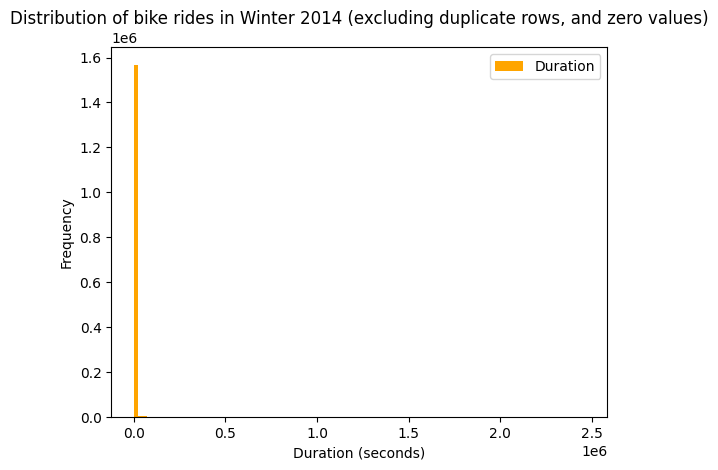

In [ ]:
#Histogram of the Main Spark Dataframe, Winter 2014 (excluding duplicate rows, and zero values)
plot_pdf_winter = year2014_df_winter_3[["Duration"]].toPandas() # take just "Duration" col, convert to pandas dataframe structure ready to plot

plot_pdf_winter.plot(kind="hist",bins=100, title="Distribution of bike rides in Winter 2014 (excluding duplicate rows, and zero values)",color='orange')
plt.xlabel("Duration (seconds)")
plt.show()

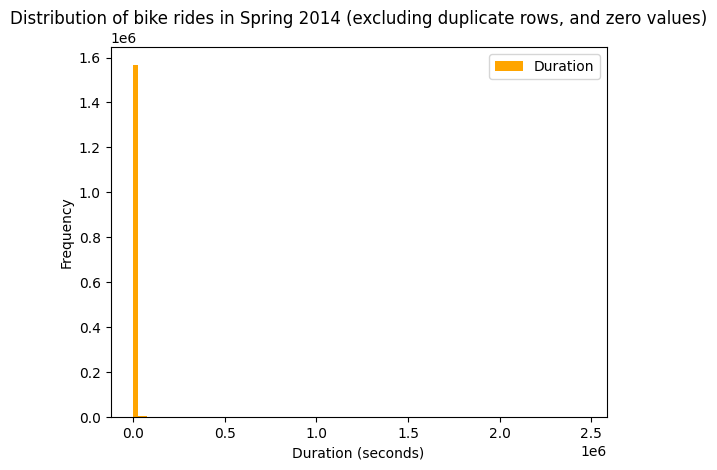

In [ ]:
#Histogram of the Main Spark Dataframe, Spring 2014 (excluding duplicate rows, and zero values)
plot_pdf_spring = year2014_df_spring[["Duration"]].toPandas() # take just "Duration" col, convert to pandas dataframe structure ready to plot

plot_pdf_winter.plot(kind="hist",bins=100, title="Distribution of bike rides in Spring 2014 (excluding duplicate rows, and zero values)",color='orange')
plt.xlabel("Duration (seconds)")
plt.show()

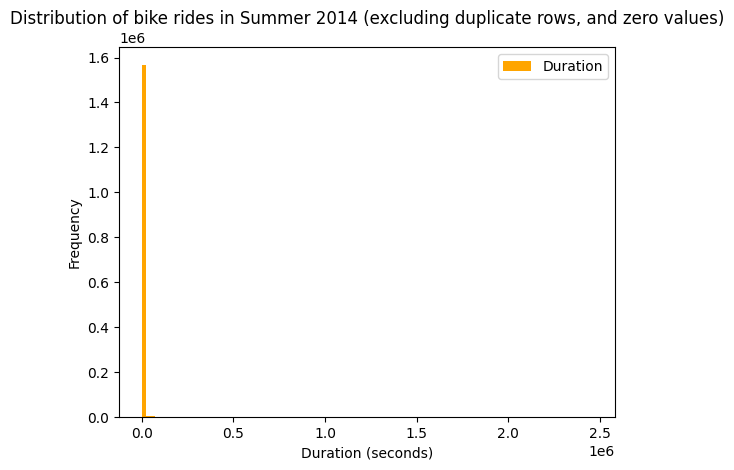

In [ ]:
#Histogram of the Main Spark Dataframe, Summer 2014 (excluding duplicate rows, and zero values)
plot_pdf_summer = year2014_df_summer[["Duration"]].toPandas() # take just "Duration" col, convert to pandas dataframe structure ready to plot

plot_pdf_winter.plot(kind="hist",bins=100, title="Distribution of bike rides in Summer 2014 (excluding duplicate rows, and zero values)",color='orange')
plt.xlabel("Duration (seconds)")
plt.show()

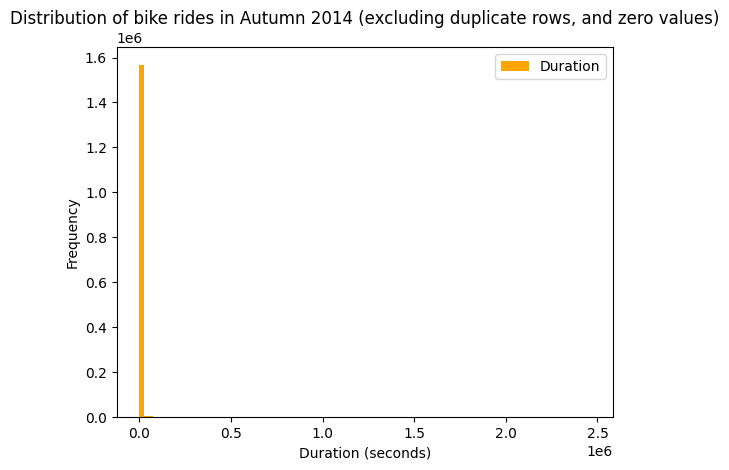

In [ ]:
#Histogram of the Main Spark Dataframe, Autumn 2014 (excluding duplicate rows, and zero values)
plot_pdf_autumn = year2014_df_autumn[["Duration"]].toPandas() # take just "Duration" col, convert to pandas dataframe structure ready to plot

plot_pdf_winter.plot(kind="hist",bins=100, title="Distribution of bike rides in Autumn 2014 (excluding duplicate rows, and zero values)",color='orange')
plt.xlabel("Duration (seconds)")
plt.show()

### **3.7.2. GRAPHS FROM THE "MAIN SPARK DATAFRAME" BUILT IN SECTION 3.6**

* The information conveyed in these graphs is after dropping the outliers.

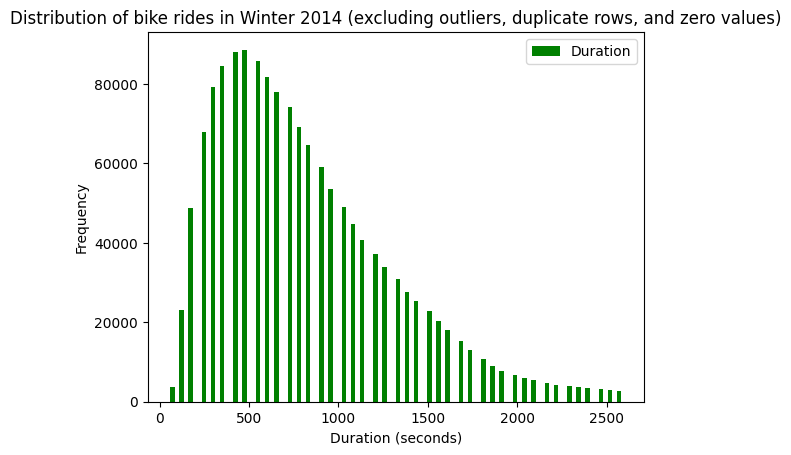

In [ ]:
#Histogram of the Main Spark Dataframe, Winter 2014 (excluding outliers, duplicate rows, and zero values)
plot_pdf_winter_woo = year2014_df_winter_3_woo[["Duration"]].toPandas()

plot_pdf_winter_woo.plot(kind="hist",bins=100, title="Distribution of bike rides in Winter 2014 (excluding outliers, duplicate rows, and zero values)",color='green')
plt.xlabel("Duration (seconds)")
plt.show()

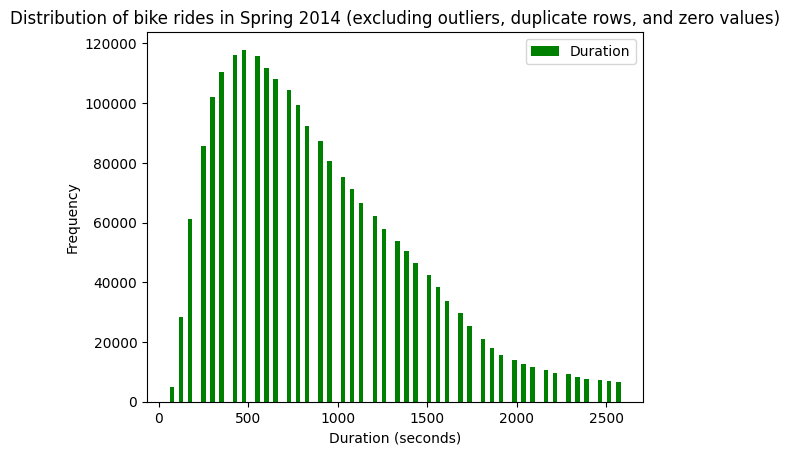

In [ ]:
#Histogram of the Main Spark Dataframe, Spring 2014 (excluding outliers, duplicate rows, and zero values)
plot_pdf_spring_woo = year2014_df_spring_woo[["Duration"]].toPandas()

plot_pdf_spring_woo.plot(kind="hist",bins=100, title="Distribution of bike rides in Spring 2014 (excluding outliers, duplicate rows, and zero values)",color='green')
plt.xlabel("Duration (seconds)")
plt.show()

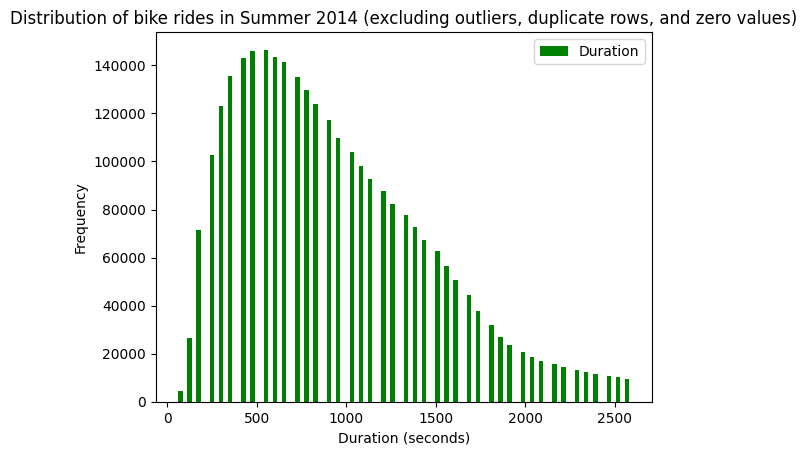

In [ ]:
#Histogram of the Main Spark Dataframe, Summer 2014 (excluding outliers, duplicate rows, and zero values)
plot_pdf_summer_woo = year2014_df_summer_woo[["Duration"]].toPandas()

plot_pdf_summer_woo.plot(kind="hist",bins=100, title="Distribution of bike rides in Summer 2014 (excluding outliers, duplicate rows, and zero values)",color='green')
plt.xlabel("Duration (seconds)")
plt.show()

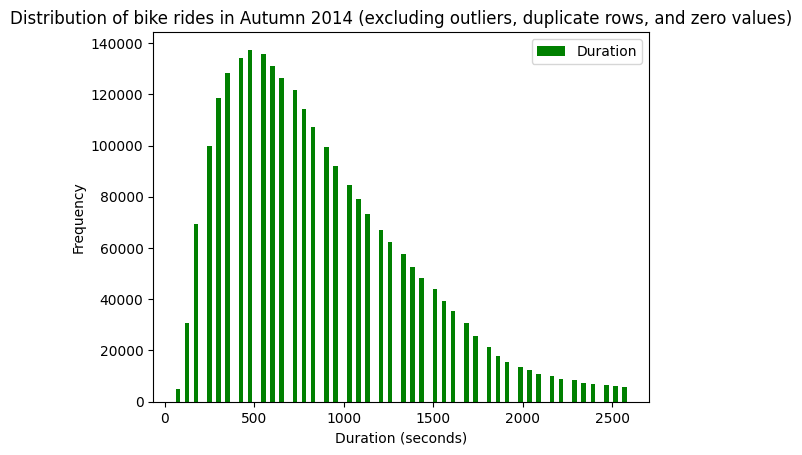

In [ ]:
#Histogram of the Main Spark Dataframe, Autumn 2014 (excluding outliers, duplicate rows, and zero values)
plot_pdf_autumn_woo = year2014_df_autumn_woo[["Duration"]].toPandas()
#print("we have ", plot_df.count()," elements to plot")

plot_pdf_autumn_woo.plot(kind="hist",bins=100, title="Distribution of bike rides in Autumn 2014 (excluding outliers, duplicate rows, and zero values)",color='green')
plt.xlabel("Duration (seconds)")
plt.show()

# **4. PREPARING THE DATA FOR THE STATISTICAL TEST, BASED ON THE "MAIN SPARK DATAFRAME" BUILT IN SECTION 3.6**


In [ ]:
#Splitting/Joining the Spark Dataframe per month (Station Baylis Road, Waterloo)
  #Filtering the Spark Dataframe of the Year 2014 according to the "StartStation Id" of the Station Baylis Road, Waterloo.
  #Grouping according to the "StartStation Id" of the Station Baylis Road, Waterloo.
  #Getting the average Duration per month of the Station Baylis Road, Waterloo.
year2014_jan_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-02-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-01-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_feb_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-03-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-02-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_mar_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-04-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-03-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_apr_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-05-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-04-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_may_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-06-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-05-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_jun_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-07-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-06-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_jul_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-08-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-07-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_aug_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-09-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-08-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_sep_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-10-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-09-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_oct_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-11-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-10-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_nov_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-12-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-11-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()
year2014_dec_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2015-01-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-12-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] == "272")).groupBy("StartStationId").avg()

  #Spark Dataframe of the Year 2014 for the Station Baylis Road, Waterloo
print("Main Dataframe:\n")
year2014_all_waterloo_df = (year2014_jan_waterloo_df
           .union(year2014_feb_waterloo_df)
           .union(year2014_mar_waterloo_df)
           .union(year2014_apr_waterloo_df)
           .union(year2014_may_waterloo_df)
           .union(year2014_jun_waterloo_df)
           .union(year2014_jul_waterloo_df)
           .union(year2014_aug_waterloo_df)
           .union(year2014_sep_waterloo_df)
           .union(year2014_oct_waterloo_df)
           .union(year2014_nov_waterloo_df)
           .union(year2014_dec_waterloo_df)
          )
year2014_all_waterloo_df

Main Dataframe:



DataFrame[StartStationId: int, avg(StartStationId): double, avg(EndStationId): double, avg(Duration): double]

In [ ]:
#Number of rows in the Spark Dataframe (aggregate) of the Year 2014 of the Station Baylis Road, Waterloo
year2014_all_waterloo_df_counts = year2014_all_waterloo_df.count()
print("There are ",year2014_all_waterloo_df_counts," rows in the Spark Dataframe (aggregate) of the Year 2014 of the Station Baylis Road, Waterloo (after filtering and grouping)\n")

There are  12  rows in the Spark Dataframe of the Year 2014 of the Station Baylis Road, Waterloo (after filtering and grouping)



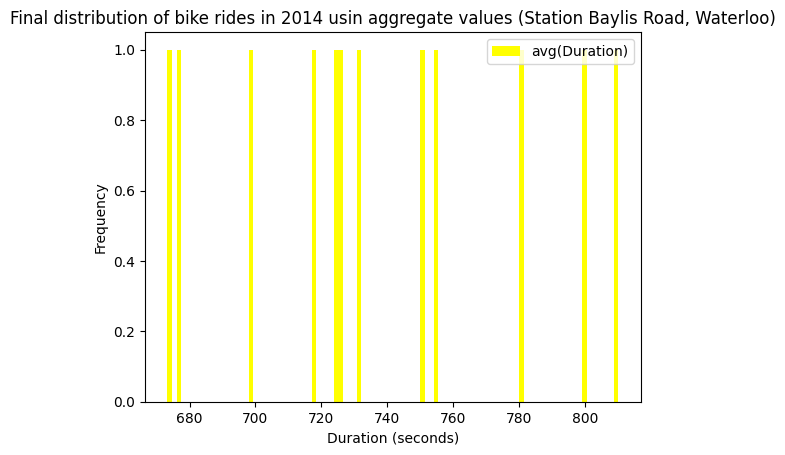

In [ ]:
#Final histogram of the Spark Dataframe (aggregate) of the Station Baylis Road, Waterloo, 2014
year2014_all_waterloo_agg_graph_df = year2014_all_waterloo_df[["avg(Duration)"]].toPandas()

year2014_all_waterloo_agg_graph_df.plot(kind="hist",bins=100, title="Final distribution of bike rides in 2014 using aggregate values (Station Baylis Road, Waterloo)",color='yellow')
plt.xlabel("Duration (seconds)")
plt.show()

In [ ]:
#Splitting/Joining the Spark Dataframe per month (stations that are not Station Baylis Road, Waterloo)
  #Filtering the Spark Dataframe of the Year 2014 according to the "StartStation Id" of the stations that are not Station Baylis Road, Waterloo.
  #Grouping according to the "StartStation Id" of the stations that are not Station Baylis Road, Waterloo.
  #Getting the average Duration per month of the stations that are not Station Baylis Road, Waterloo.
year2014_jan_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-02-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-01-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_feb_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-03-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-02-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_mar_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-04-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-03-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_apr_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-05-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-04-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_may_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-06-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-05-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_jun_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-07-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-06-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_jul_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-08-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-07-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_aug_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-09-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-08-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_sep_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-10-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-09-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_oct_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-11-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-10-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_nov_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2014-12-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-11-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()
year2014_dec_no_waterloo_df = year2014_df0_no_woo.filter((year2014_df0_no_woo['StartDate'] < "2015-01-01 00:00:00") & (year2014_df0_no_woo['StartDate'] >= "2014-12-01 00:00:00") & (year2014_df0_no_woo["StartStationId"] != "272")).groupBy("StartStationId").avg()

# Main Spark Dataframe
print("Main Dataframe:\n")
year2014_all_no_waterloo_df = (year2014_jan_no_waterloo_df
           .union(year2014_feb_no_waterloo_df)
           .union(year2014_mar_no_waterloo_df)
           .union(year2014_apr_no_waterloo_df)
           .union(year2014_may_no_waterloo_df)
           .union(year2014_jun_no_waterloo_df)
           .union(year2014_jul_no_waterloo_df)
           .union(year2014_aug_no_waterloo_df)
           .union(year2014_sep_no_waterloo_df)
           .union(year2014_oct_no_waterloo_df)
           .union(year2014_nov_no_waterloo_df)
           .union(year2014_dec_no_waterloo_df)
          )
year2014_all_no_waterloo_df

Main Dataframe:



DataFrame[StartStationId: int, avg(StartStationId): double, avg(EndStationId): double, avg(Duration): double]

In [ ]:
#Number of rows in the Spark Dataframe (average) of the Year 2014 of the stations that are not Station Baylis Road, Waterloo.
year2014_all_no_waterloo_df_counts = year2014_all_no_waterloo_df.count()
print("There are ",year2014_all_no_waterloo_df_counts," rows in the Spark Dataframe (aggregate) of the Year 2014 of the stations that are not Station Baylis Road, Waterloo (after filtering and grouping)\n")

There are  8914  rows in the Spark Dataframe of the Year 2014 of the stations that are not Station Baylis Road, Waterloo (after filtering and grouping)



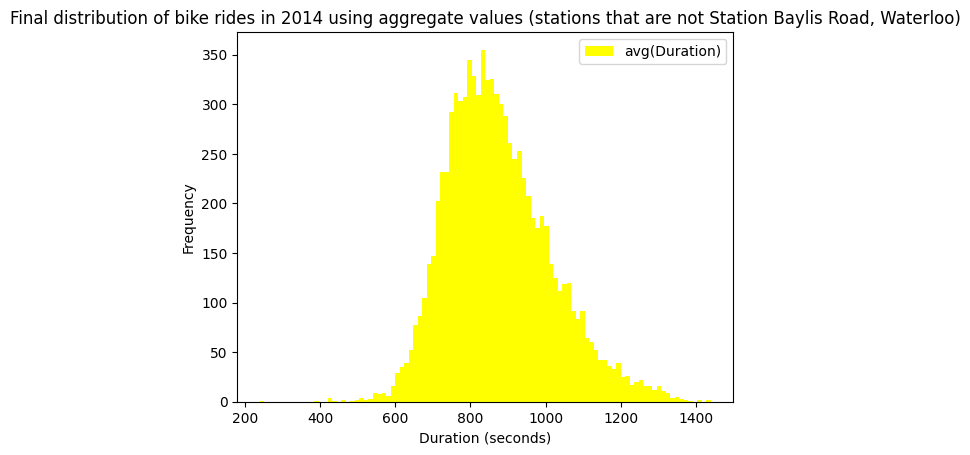

In [ ]:
#Final histogram of the Spark Dataframe (aggregate) of the stations that are not Station Baylis Road, Waterloo.
year2014_all_no_waterloo_agg_graph_df = year2014_all_no_waterloo_df[["avg(Duration)"]].toPandas()

year2014_all_no_waterloo_agg_graph_df.plot(kind="hist",bins=100, title="Final distribution of bike rides in 2014 using aggregate values (stations that are not Station Baylis Road, Waterloo)",color='purple')
plt.xlabel("Duration (seconds)")
plt.show()

In [ ]:
#Dropping all the columns except the column of "StartStationId" and "Average Duration" for the Spark dataframes (aggregate):
columns_to_drop = ['avg(StartStationId)','avg(EndStationId)']
  #Station Baylis Road, Waterloo for the year 2014
year2014_all_waterloo_df = year2014_all_waterloo_df.drop(*columns_to_drop)
year2014_all_waterloo_df
  #Stations that are not Baylis Road, Waterloo for the year 2014
year2014_all_no_waterloo_df = year2014_all_no_waterloo_df.drop(*columns_to_drop)
year2014_all_no_waterloo_df

DataFrame[StartStationId: int, avg(Duration): double]

In [ ]:
#Transforming Spark dataframes to Pandas dataframes with the aim to exectute statistical Test in Scipy.
pandas_df = year2014_all_waterloo_df.toPandas()
pandas_df2 = year2014_all_no_waterloo_df.toPandas()

# **5. STATISTICAL TEST (HYPOTHESIS TEST)**

* **Goal**:  apply an statistical test (hypothesis test) to determine if *“Rides in 2014 starting from Baylis Road, Waterloo station were shorter compared to other stations”*.

* **Note**: *SciPy* is the Python library that is going to be used for executing the statistical test (hypothesis test).

* **Levene Test (General)**:
  * It is a test executed to check an assumption of another other statistical test, in this case the assumption checked is for the "T-test for the means of two independent samples".
  * Levene Test is useful for comparing whether two or more groups of samples have equal variance.
  * The "T-test for the means of two independent samples" requires checking the "homogeneity of variances" assumption if the groups have clearly different sample sizes. In this case, the sample size of the group of "Baylis Road, Waterloo station" is clearly different from the sample size of the "stations that are not Baylis Road, Waterloo station."

* **Levene Test (Assumptions)**:
  * Independent observations.
  * The variables that is going to be tested is metric.

* **Levene Test (Hypothesis)**:
  * Levene Test's Null hypothesis (H0): states that the group samples to be compared have the same variances or their variances are not significantly different.
    * If the p-value > 0.05, the variances are considered not significantly different from each other.
  * Levene Test's Alternative hypothesis (H1): states that the samples to be compared have significantly different variances.
    * If the p-value < 0.05, the variances are considered significantly different from each other.

* **Note**: The "significance level" that is going to be used for comparing the "probability value" (i.e., the "p-value") and determine if there is or not strong evidence to reject the Null Hypothesis is 5% or 0.05

In [ ]:
#Transform from Pandas dataframes to Pandas Series
group1 = pandas_df.drop(['StartStationId'], axis=1)
group11 = group1.squeeze()
print(type(group11))

group2 = pandas_df2.drop(['StartStationId'], axis=1)
group22 = group2.squeeze()
print(type(group22))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
#Levene Test
from scipy.stats import levene
import scipy.stats as stats

#center = "mean" because the distributions of the groups of data are symmetric.
statistic, p_value = levene(group11, group22, center='mean')

# Check the p-value
print("\nstatistic, Levene's test:", statistic)
print("\np-value, Levene's test:", p_value)

if p_value < 0.05:
    print("\nVariances between the compared groups are significantly different (p_value < 0.05); therefore, the Null Hypothesis can be rejected.\n")
else:
    print("\nVariances between the compared groups are not significantly different (p_value > 0.05); therefore, we fail to reject the Null Hypothesis.\n")


statistic, Levene's test: 9.07578257772296

p-value, Levene's test: 0.002597429565560061

Variances are significantly different (p_value < 0.05); therefore, the Null Hypothesis can be rejected.



In [ ]:
#T-test for the means of two independent samples

  #Considering that the previous test (i.e., the Levene Test) the Null Hypothesis was rejected...
  #...(i.e., Variances between the compared groups are significantly different) the argument...
  #..."equal_var" is set to "False" in the function "stats.ttest_ind"

  #Considering that dataset called "group11" corresponds to the values of the "Baylis Road, Waterloo station",...
  #...the dataset (called "group11") was the first argument in the function "stats.ttest_ind" and....
  #...the mean of the distribution of the dataset (called "group11") is less than the mean of the....
  #...distribution of the dataset (called "group22" which corresponds to the "other stations")...
  #...the "alternative" is set to "less" (i.e., the "alternative" is set to "less").

from scipy import stats
statistict, p_valuet  = stats.ttest_ind(group11, group22, axis=0, equal_var=False, nan_policy='omit',alternative='less')

# Check the p-value
print("\nstatistic, T-test for the means of two independent samples:", statistict)
print("\np-value, T-test for the means of two independent samples:", p_valuet)

if p_valuet < 0.05:
    print("\nMean values are significantly different (p_value < 0.05); therefore, the Null Hypothesis can be rejected.\n")
    print("Consequently, the evidence provided by the data is strongly enough to statistically conclude that\n" +
    "the Rides in 2014 starting from Baylis Road, Waterloo station were shorter compared to other stations.\n")
else:
    print("\Mean values are not significantly different (p_value > 0.05); therefore, we fail to reject the Null Hypothesis.\n")


statistic, T-test for the means of two independent samples: -10.623536402242172

p-value, T-test for the means of two independent samples: 1.5987644109689258e-07

Mean values are significantly different (p_value < 0.05); therefore, the Null Hypothesis can be rejected.

Consequently, the evidence provided by the data is strongly enough to statistically conclude that
the Rides in 2014 starting from Baylis Road, Waterloo station were shorter compared to other stations.

